In [1]:
# We import resources
import sys
sys.path.append('../../')
from numpy import *
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from Trajectory import *
import multiprocessing as mltp
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# We instantiate the model for far
sif = [-3003.20255298,  3610.03013931,   -75.5395321 ,   -65.83635707,
        7525.01646505]
'''
sifl = array([[-3003.20255298,  3610.03013931,   -75.5395321 ,   -65.83635707,
         7525.01646505],
       [-4021.18149083,  3710.3305033 ,  -114.40904341,   -32.72018816,
         7764.81749097],
       [  -11.89780765,     8.27973773,    12.63983686,    -8.92072402,
         6305.31559359]])
'''
sic = [-243.53707153,  4296.31407193,  -142.61335252,  -119.98680334,
        6675.1642641]
'''
sicl = array([[ -243.53707153,  4296.31407193,  -142.61335252,  -119.98680334,
         6675.1642641 ],
       [-1294.40328521,  2037.01427177,    55.51598959,   -62.51698019,
         6341.85177689],
       [  -38.18822564,    22.58251099,    24.14829986,   -15.04262069,
         5911.67741276]])
'''
context = 'Mars_Combined'
dim     = (20, 3)
if context == 'Mars_Far':
    si = sif
    #sil = sifl
if context == 'Mars_Close':
    si = sic
    #sil = sicl
if context == 'Mars_Combined':
    si = sic
    
path = '../../Data/Figs/' + context + '_' + str(dim[0]) + 'x' + str(dim[1])
model = Point_Lander_Drag(si)

In [3]:
# We state some parametres for the neural net
model.controller = Neural(model, context, dim).Control

In [4]:
# Time should not matter much
tf = 500
# The resolution of the integration
nnodes = 500

In [5]:
# We now propagate the model with the trained neural network
s, c = model.Propagate.Neural(si, tf, nnodes, False)

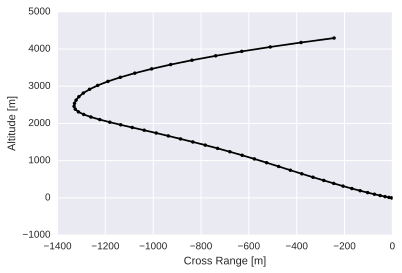

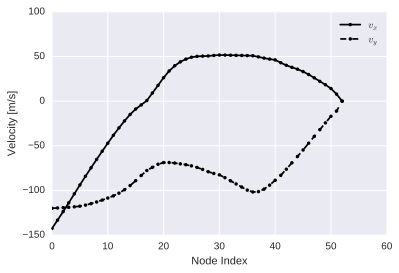

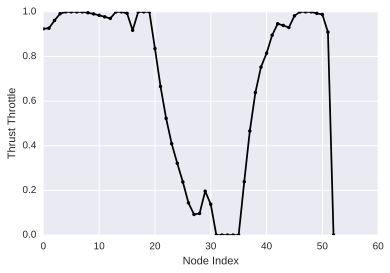

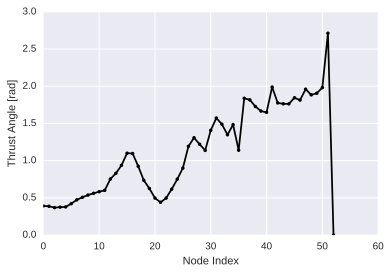

In [6]:
i = 53

plt.close('all')
plt.plot(s[:i,0], s[:i,1], 'k.-')
plt.xlabel('Cross Range [m]')
plt.ylabel('Altitude [m]')
fn = path + '_r.svg'
plt.savefig(fn, format='svg',transparent=True, bbox_inches='tight')
plt.show()

plt.plot(s[:i,2], 'k.-')
plt.plot(s[:i,3], 'k.--')
plt.xlabel('Node Index')
plt.ylabel('Velocity [m/s]')
plt.legend(['$v_x$', '$v_y$'])
fn = path + '_v.svg'
plt.savefig(fn, format='svg',transparent=True, bbox_inches='tight')
plt.show()

plt.plot(c[:i,0], 'k.-')
plt.xlabel('Node Index')
plt.ylabel('Thrust Throttle')
fn = path + '_throttle.svg'
plt.savefig(fn, format='svg',transparent=True, bbox_inches='tight')
plt.show()

plt.plot(c[:i,1], 'k.-')
plt.xlabel('Node Index')
plt.ylabel('Thrust Angle [rad]')
fn = path + '_angle.svg'
plt.savefig(fn, format='svg',transparent=True, bbox_inches='tight')
plt.show()